In [1]:
import math
import warnings
import sys

from numpy.lib.function_base import average
from sklearn.utils import multiclass
from xgboost.sklearn import XGBRFClassifier
warnings.filterwarnings("ignore")
import numpy as np
from statistics import mean, mode
import pandas as pd
import medical_lib as ml
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import plot_importance
from matplotlib import pyplot
from xgboost.core import Booster
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import IsolationForest
from numpy import sort
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_recall_fscore_support as score

Einlesen der Daten

In [2]:
medDatamodel3 = pd.read_csv('naive_latest_todesinterval_model3.csv') #naive_latest_model3_TMP
medDataCopy_model3 = medDatamodel3.copy()
medDataCopy_model3 = medDataCopy_model3.iloc[:, 3:]

med_class_model3 = medDataCopy_model3.iloc[:, -1]
med_features_model3 = medDataCopy_model3.iloc[:, :-1]

# Aufteilen der Daten in 4 Untersets
med_features_train_model3, med_features_test_model3, med_class_train_model3, med_class_test_model3 = train_test_split(med_features_model3, med_class_model3, test_size=0.2, random_state=43, stratify=med_class_model3)
med_class_test_array = np.array(med_class_test_model3)

result = pd.read_csv('automated_algorithmen.csv')
result = result.iloc[:, 1:]

KNN

In [3]:
medKNN = KNeighborsClassifier(n_neighbors=4)
medKNN.fit(med_features_train_model3,med_class_train_model3)
knnYpred = medKNN.predict(med_features_test_model3)
accuracyKNN = accuracy_score(knnYpred, med_class_test_array)
precisionKNN = precision_score(knnYpred, med_class_test_array, average='weighted')
recallKNN = recall_score(knnYpred, med_class_test_array, average='weighted')
f1scoreKNN = f1_score(knnYpred, med_class_test_array, average='weighted')
print('K: ', 4, 'KNN Accuracy: ', accuracyKNN, 'KNN Precision: ', precisionKNN, 'KNN Recall: ', recallKNN, 'KNN F1-Score: ', f1scoreKNN )
pred_tot_lebendigknn = []
actual_tot_lebendigknn = []
abweichungknn = []
for el in range(0, len(knnYpred)):
    dist = abs(knnYpred[el] - med_class_test_array[el])
    abweichungknn.append(dist)
    if knnYpred[el] < 7:
        pred_tot_lebendigknn.append(1)
    else: 
        pred_tot_lebendigknn.append(0)
    if med_class_test_array[el] < 7:
        actual_tot_lebendigknn.append(1)
    else:
        actual_tot_lebendigknn.append(0)
accuracyknn, precisionknn, recallknn, f1scoreknn = ml.scoring(pred_tot_lebendigknn, actual_tot_lebendigknn)
print(pred_tot_lebendigknn)
print('')
print(actual_tot_lebendigknn)
print('Tatsächlich: ', accuracyknn, precisionknn, recallknn, f1scoreknn)
print('Durchschnittliche Abweichung: ', mean(abweichungknn))
print('Standartabweichung der Abweichung: ', np.std(abweichungknn))
index = result.index[result['Modellierung'] == 'Model_3'].tolist()
result.at[index, 'KNN_precision'] = precisionknn
result.at[index, 'KNN_recall'] = recallknn
result.at[index, 'KNN_f1'] = f1scoreknn
result.to_csv('automated_algorithmen.csv')
# pyplot.hist(abweichungknn)
# pyplot.title('Häugifkeitsverteilung der Abweichungen: K-Nearest Neighbor')
# pyplot.xlabel("Wert")
# pyplot.ylabel("Häufigkeit")
# pyplot.show()

K:  4 KNN Accuracy:  0.6956521739130435 KNN Precision:  0.7503281873555976 KNN Recall:  0.6956521739130435 KNN F1-Score:  0.7215397028376569
[0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0]

[0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0]
Tatsächlich:  0.782608695652174 0.5882352941176471 0.43478260869565216 0.5
Durchschnittliche Abweichung:  0
Standartabweichung der Abweichung:  1.1712933733064517


Logistic Regression

In [4]:
lr_model = LogisticRegression(solver='newton-cg' ,multi_class='multinomial')
lr_model.fit(med_features_train_model3, med_class_train_model3)
lr_y_pred = lr_model.predict(med_features_test_model3)
lr_accuracyLogReg = accuracy_score(lr_y_pred, med_class_test_array)
lr_precisionLogReg = precision_score(lr_y_pred, med_class_test_array, average='weighted')
lr_recallLogReg = recall_score(lr_y_pred, med_class_test_array, average='weighted')
lr_f1scoreLogReg = f1_score(lr_y_pred, med_class_test_array, average='weighted')
print('Log-Regression Accuracy: ', lr_accuracyLogReg, 'Log-Regression Precision: ', lr_precisionLogReg, 'Log-Regression Recall: ', lr_recallLogReg, 'Log-Regression F1-Score: ', lr_f1scoreLogReg )
pred_tot_lebendiglr = []
actual_tot_lebendiglr = []
abweichunglr = []
for el in range(0, len(lr_y_pred)):
    dist = abs(lr_y_pred[el] - med_class_test_array[el])
    abweichunglr.append(dist)
    if lr_y_pred[el] < 7:
        pred_tot_lebendiglr.append(1)
    else: 
        pred_tot_lebendiglr.append(0)
    if med_class_test_array[el] < 7:
        actual_tot_lebendiglr.append(1)
    else:
        actual_tot_lebendiglr.append(0)
accuracylr, precisionlr, recalllr, f1scorelr = ml.scoring(pred_tot_lebendiglr, actual_tot_lebendiglr)
print(pred_tot_lebendiglr)
print('')
print(actual_tot_lebendiglr)
print('Tatsächlich: ', accuracylr, precisionlr, recalllr, f1scorelr)
print('Durchschnittliche Abweichung: ', mean(abweichunglr))
print('Standartabweichung der Abweichung: ', np.std(abweichunglr))
index = result.index[result['Modellierung'] == 'Model_3'].tolist()
result.at[index, 'Logistic_Regression_precision'] = precisionlr
result.at[index, 'Logistic_Regression_recall'] = recalllr
result.at[index, 'Logistic_Regression_f1'] = f1scorelr
result.to_csv('automated_algorithmen.csv')

# pyplot.hist(abweichunglr)
# pyplot.title('Häugifkeitsverteilung der Abweichungen: Logistic Regression')
# pyplot.xlabel("Wert")
# pyplot.ylabel("Häufigkeit")
# pyplot.show()

Log-Regression Accuracy:  0.717391304347826 Log-Regression Precision:  0.7670132325141776 Log-Regression Recall:  0.717391304347826 Log-Regression F1-Score:  0.7413347522043174
[0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

[0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0]
Tatsächlich:  0.8152173913043478 0.6666666666666666 0.5217391304347826 0.5853658536585366
Durchschnittliche Abweichung:  0
Standartabweichung der Abweichung:  1.0545158987508612


Decision Tree

In [5]:
medical_DecTree = DecisionTreeClassifier(random_state=17)
medical_DecTree = medical_DecTree.fit(med_features_train_model3, med_class_train_model3)
decTree_pred = medical_DecTree.predict(med_features_test_model3)
accuracyDecTree = accuracy_score(decTree_pred, med_class_test_array)
precisionDecTree = precision_score(decTree_pred, med_class_test_array, average='weighted')
recallDecTree = recall_score(decTree_pred, med_class_test_array, average='weighted')
f1scoreDecTree = f1_score(decTree_pred, med_class_test_array, average='weighted')
print('Decision Tree: ','medical_DecTree Accuracy: ', accuracyDecTree, 'DecTree Precision: ', precisionDecTree, 'DecTree Recall: ', recallDecTree, 'DecTree F1-Score: ', f1scoreDecTree )
pred_tot_lebendigdc = []
actual_tot_lebendigdc = []
abweichungdc = []
for el in range(0, len(decTree_pred)):
    dist = abs(decTree_pred[el] - med_class_test_array[el])
    abweichungdc.append(dist)
    if decTree_pred[el] < 7:
        pred_tot_lebendigdc.append(1)
    else: 
        pred_tot_lebendigdc.append(0)
    if med_class_test_array[el] < 7:
        actual_tot_lebendigdc.append(1)
    else:
        actual_tot_lebendigdc.append(0)
accuracydc, precisiondc, recalldc, f1scoredc = ml.scoring(pred_tot_lebendigdc, actual_tot_lebendigdc)
print(pred_tot_lebendigdc)
print('')
print(actual_tot_lebendigdc)
print('Tatsächlich: ', accuracydc, precisiondc, recalldc, f1scoredc)
print('Durchschnittliche Abweichung: ', mean(abweichungdc))
print('Standartabweichung der Abweichung: ', np.std(abweichungdc))
index = result.index[result['Modellierung'] == 'Model_3'].tolist()
result.at[index, 'Decision_Tree_precision'] = precisiondc
result.at[index, 'Decision_Tree_recall'] = recalldc
result.at[index, 'Decision_Tree_f1'] = f1scoredc
result.to_csv('automated_algorithmen.csv')

# pyplot.hist(abweichungdc)
# pyplot.title('Häugifkeitsverteilung der Abweichungen: Decision Tree')
# pyplot.xlabel("Wert")
# pyplot.ylabel("Häufigkeit")
# pyplot.show()

Decision Tree:  medical_DecTree Accuracy:  0.6630434782608695 DecTree Precision:  0.6458952200918174 DecTree Recall:  0.6630434782608695 DecTree F1-Score:  0.6535929951690821
[0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0]

[0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0]
Tatsächlich:  0.75 0.5 0.5652173913043478 0.5306122448979592
Durchschnittliche Abweichung:  0
Standartabweichung der Abweichung:  1.1987607810601495


Random Forest

In [6]:
medical_RF = RandomForestClassifier(n_estimators= 100, random_state=17)
medical_RF.fit(med_features_train_model3, med_class_train_model3)
rfPred = medical_RF.predict(med_features_test_model3)
accuracyRF = accuracy_score(rfPred, med_class_test_array)
precisionRF = precision_score(rfPred, med_class_test_array, average='weighted')
recallRF = recall_score(rfPred, med_class_test_array, average='weighted')
f1scoreRF = f1_score(rfPred, med_class_test_array, average='weighted')
print('Anzahl Estimator: 100 ', 'RF Accuracy: ', accuracyRF, 'RF Precision: ', precisionRF, 'RF Recall: ', recallRF, 'RF F1-Score: ', f1scoreRF )
pred_tot_lebendigrf = []
actual_tot_lebendigrf = []
abweichungrf = []
for el in range(0, len(rfPred)):
    dist = abs(rfPred[el] - med_class_test_array[el])
    abweichungrf.append(dist)
    if rfPred[el] < 7:
        pred_tot_lebendigrf.append(1)
    else: 
        pred_tot_lebendigrf.append(0)
    if med_class_test_array[el] < 7:
        actual_tot_lebendigrf.append(1)
    else:
        actual_tot_lebendigrf.append(0)
accuracyrf, precisionrf, recallrf, f1scorerf = ml.scoring(pred_tot_lebendigrf, actual_tot_lebendigrf)
print(pred_tot_lebendigrf)
print('')
print(actual_tot_lebendigrf)
print('Tatsächlich: ', accuracyrf, precisionrf, recallrf, f1scorerf)
print('Durchschnittliche Abweichung: ', mean(abweichungrf))
print('Standartabweichung der Abweichung: ', np.std(abweichungrf))
index = result.index[result['Modellierung'] == 'Model_3'].tolist()
result.at[index, 'Random_Forest_precision'] = precisionrf
result.at[index, 'Random_Forest_recall'] = recallrf
result.at[index, 'Random_Forest_f1'] = f1scorerf
result.to_csv('automated_algorithmen.csv')

# pyplot.hist(abweichungrf)
# pyplot.title('Häugifkeitsverteilung der Abweichungen: Random Forest')
# pyplot.xlabel("Wert")
# pyplot.ylabel("Häufigkeit")
# pyplot.show()

Anzahl Estimator: 100  RF Accuracy:  0.717391304347826 RF Precision:  0.8733459357277884 RF Recall:  0.717391304347826 RF F1-Score:  0.7877237851662404
[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

[0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0]
Tatsächlich:  0.7717391304347826 0.625 0.21739130434782608 0.3225806451612903
Durchschnittliche Abweichung:  0
Standartabweichung der Abweichung:  1.1743155509625656


ADABoost

In [7]:
adamodel = AdaBoostClassifier()
adamodel.fit(med_features_train_model3, med_class_train_model3)
adamodel_prediction = adamodel.predict(med_features_test_model3)
adamodel_accuracy = accuracy_score(med_class_test_model3, adamodel_prediction)
adamodel_precision = precision_score(med_class_test_model3, adamodel_prediction, average='weighted')
adamodel_recall = recall_score(med_class_test_model3, adamodel_prediction, average='weighted')
adamodel_f1 = f1_score(med_class_test_model3, adamodel_prediction, average='weighted')
print('ADABOOST: ', 'Accuracy: ', adamodel_accuracy,'Precision: ', adamodel_precision,'Recall: ', adamodel_recall,'f1-Score: ', adamodel_f1)
pred_tot_lebendigada = []
actual_tot_lebendigada = []
abweichungada = []
for el in range(0, len(adamodel_prediction)):
    dist = abs(adamodel_prediction[el] - med_class_test_array[el])
    abweichungada.append(dist)
    if adamodel_prediction[el] < 7:
        pred_tot_lebendigada.append(1)
    else: 
        pred_tot_lebendigada.append(0)
    if med_class_test_array[el] < 7:
        actual_tot_lebendigada.append(1)
    else:
        actual_tot_lebendigada.append(0)
accuracyada, precisionada, recallada, f1scoreada = ml.scoring(pred_tot_lebendigada, actual_tot_lebendigada)
print(pred_tot_lebendigada)
print('')
print(actual_tot_lebendigada)
print('Tatsächlich: ', accuracyada, precisionada, recallada, f1scoreada)
print('Durchschnittliche Abweichung: ', mean(abweichungada))
print('Standartabweichung der Abweichung: ', np.std(abweichungada))
index = result.index[result['Modellierung'] == 'Model_3'].tolist()
result.at[index, 'ADABoost_precision'] = precisionada
result.at[index, 'ADABoost_recall'] = recallada
result.at[index, 'ADABoost_f1'] = f1scoreada
result.to_csv('automated_algorithmen.csv')

# pyplot.hist(abweichungada)
# pyplot.title('Häugifkeitsverteilung der Abweichungen: ADABoost')
# pyplot.xlabel("Wert")
# pyplot.ylabel("Häufigkeit")
# pyplot.show()

ADABOOST:  Accuracy:  0.6086956521739131 Precision:  0.7019809900244682 Recall:  0.6086956521739131 f1-Score:  0.6439945054945053
[0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0]

[0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0]
Tatsächlich:  0.6847826086956522 0.4166666666666667 0.6521739130434783 0.5084745762711865
Durchschnittliche Abweichung:  0
Standartabweichung der Abweichung:  1.1192485833381018


XGBoost

XGBOOST:  Accuracy:  0.7282608695652174 Precision:  0.6745652173913044 Recall:  0.7282608695652174 F1-Score:  0.6998236079328756
[0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

[0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0]
Tatsächlich:  0.8043478260869565 0.6470588235294118 0.4782608695652174 0.55
Durchschnittliche Abweichung:  0
Standartabweichung der Abweichung:  1.0545158987508612
#################################################################################################


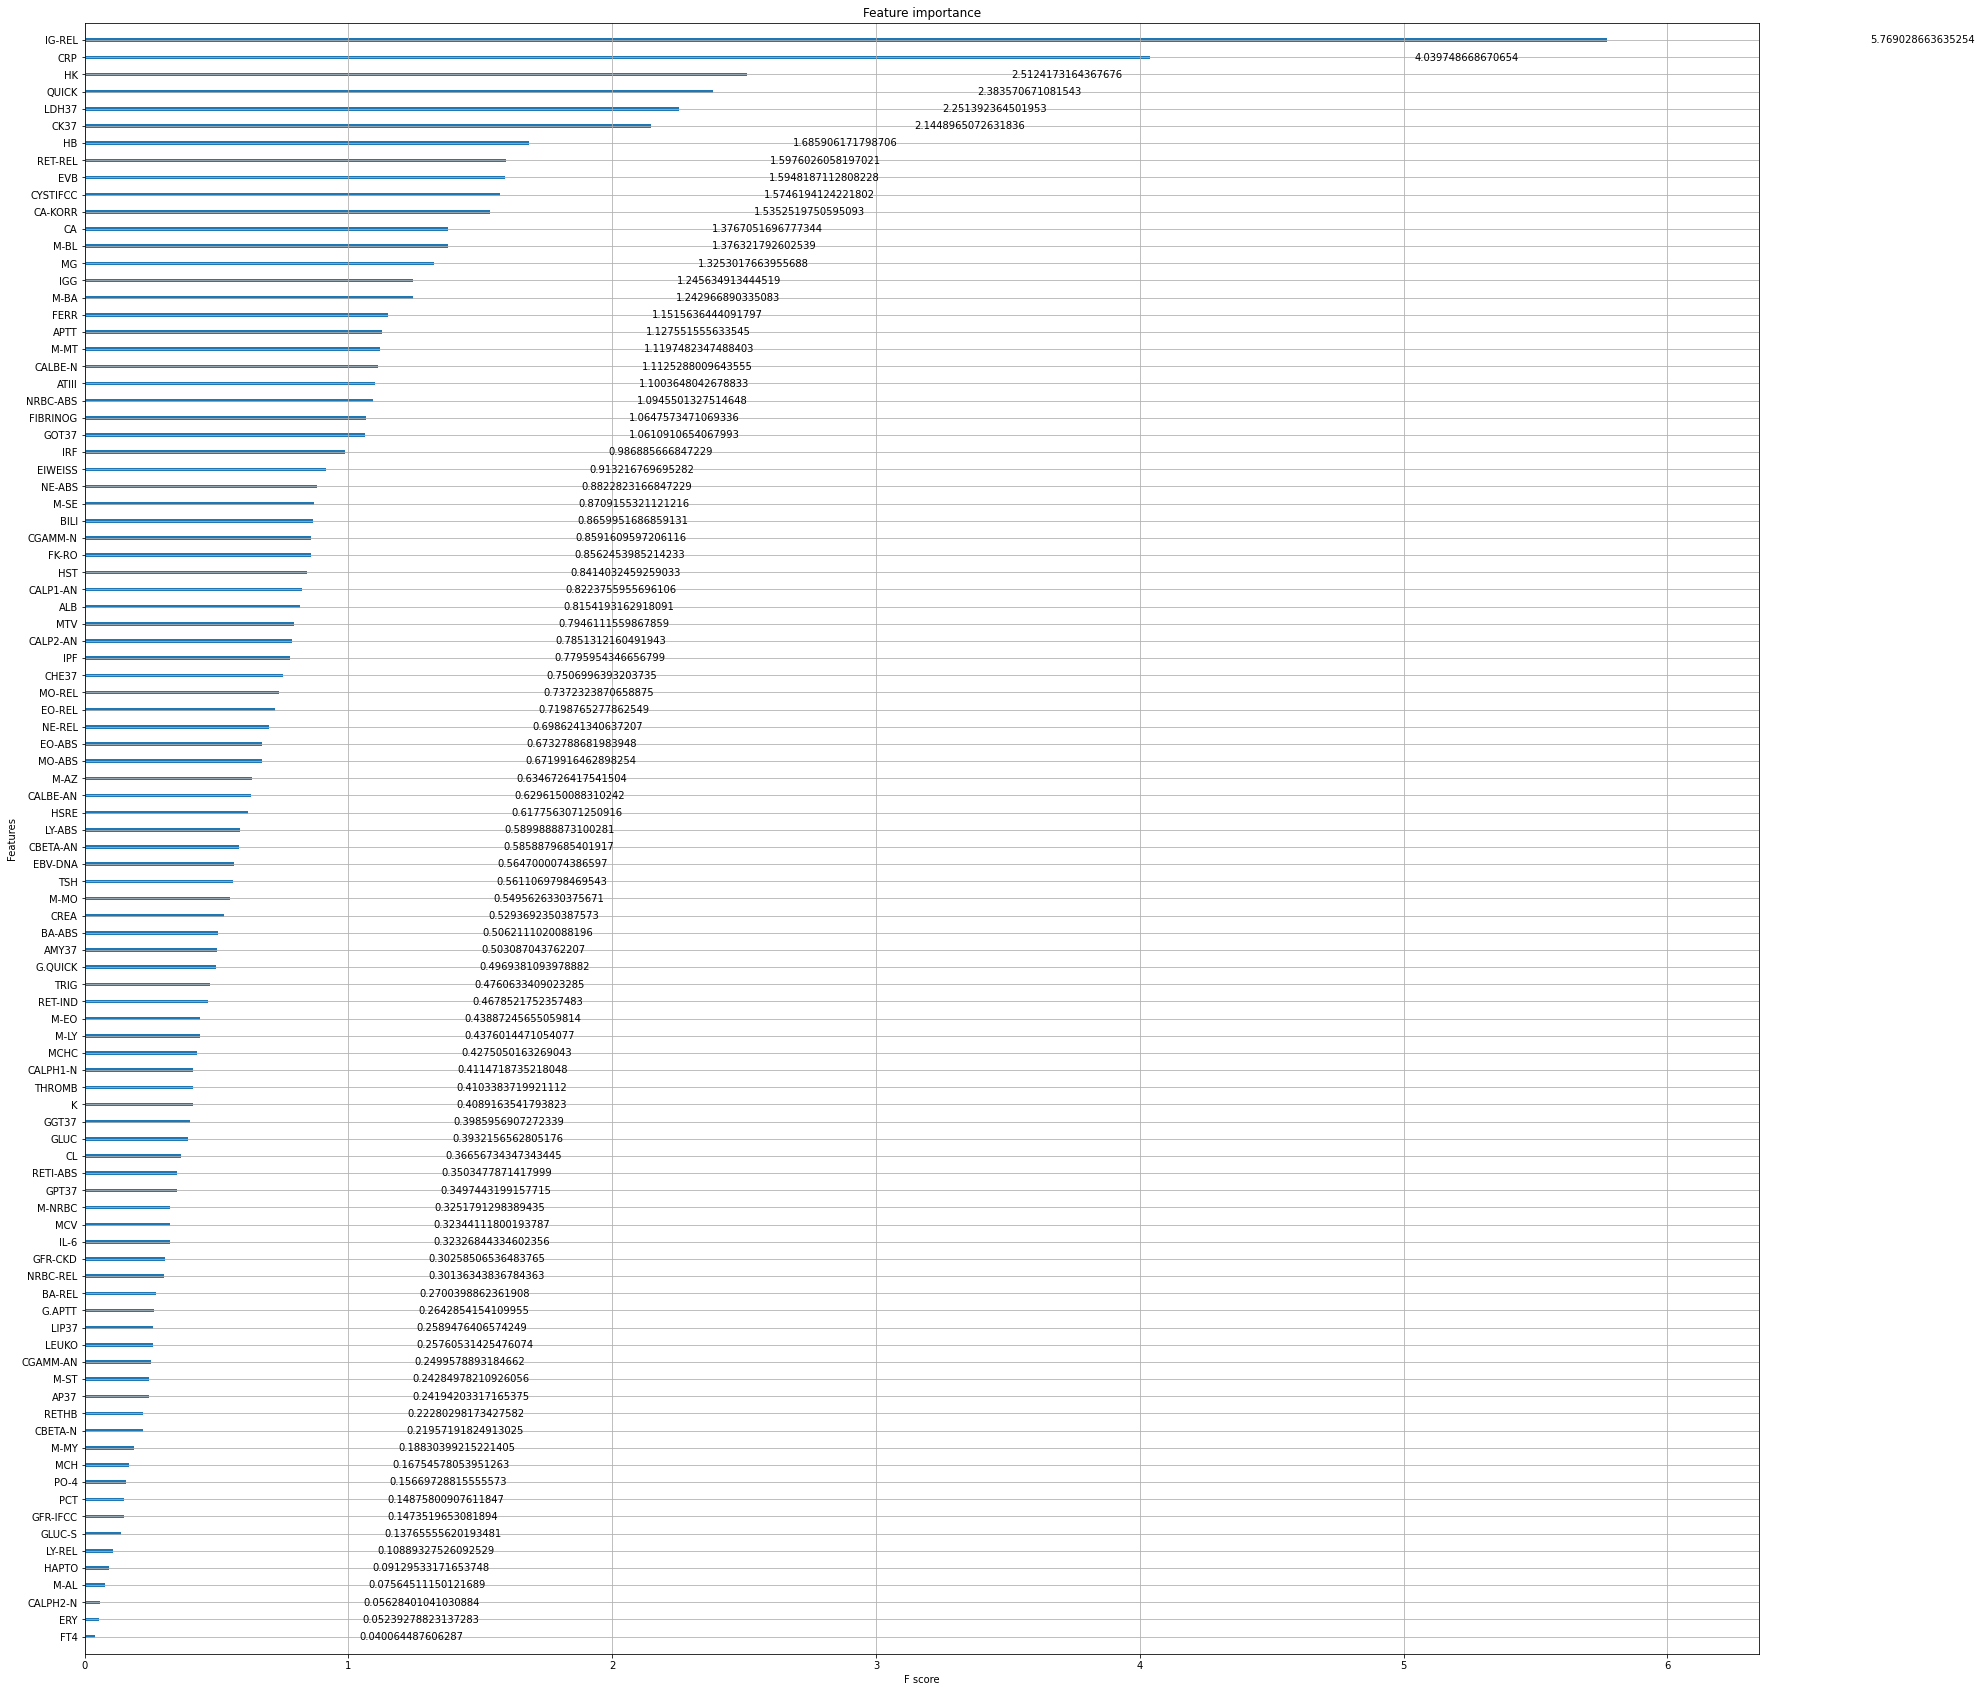

In [8]:
xgmodel = XGBClassifier(n_estimators=100, eval_metric = 'mlogloss')
xgmodel.fit(med_features_train_model3, med_class_train_model3)
xgboosted_prediction = xgmodel.predict(med_features_test_model3)
xgboosted_accuracy = accuracy_score(med_class_test_model3, xgboosted_prediction)
xgboosted_precision = precision_score(med_class_test_model3, xgboosted_prediction, average='weighted')
xgboosted_recall = recall_score(med_class_test_model3, xgboosted_prediction, average='weighted')
xgboosted_f1 = f1_score(med_class_test_model3, xgboosted_prediction, average='weighted')
print('XGBOOST: ', 'Accuracy: ', xgboosted_accuracy, 'Precision: ', xgboosted_precision, 'Recall: ', xgboosted_recall, 'F1-Score: ', xgboosted_f1)
pred_tot_lebendigxg = []
actual_tot_lebendigxg = []
abweichungxg = []
for el in range(0, len(xgboosted_prediction)):
    dist = abs(xgboosted_prediction[el] - med_class_test_array[el])
    abweichungxg.append(dist)
    if xgboosted_prediction[el] < 7:
        pred_tot_lebendigxg.append(1)
    else: 
        pred_tot_lebendigxg.append(0)
    if med_class_test_array[el] < 7:
        actual_tot_lebendigxg.append(1)
    else:
        actual_tot_lebendigxg.append(0)
accuracyxg, precisionxg, recallxg, f1scorexg = ml.scoring(pred_tot_lebendigxg, actual_tot_lebendigxg)
print(pred_tot_lebendigxg)
print('')
print(actual_tot_lebendigxg)
print('Tatsächlich: ', accuracyxg, precisionxg, recallxg, f1scorexg)
print('Durchschnittliche Abweichung: ', mean(abweichungxg))
print('Standartabweichung der Abweichung: ', np.std(abweichungxg))
print('#################################################################################################')
index = result.index[result['Modellierung'] == 'Model_3'].tolist()
result.at[index, 'XGBoost_precision'] = precisionxg
result.at[index, 'XGBoost_recall'] = recallxg
result.at[index, 'XGBoost_f1'] = f1scorexg
result.to_csv('automated_algorithmen.csv')

# pyplot.hist(abweichungxg)
# pyplot.title('Häugifkeitsverteilung der Abweichungen: XGBoost')
# pyplot.xlabel("Wert")
# pyplot.ylabel("Häufigkeit")
# pyplot.show()
featureranking = sorted((value, key) for (key, value) in xgmodel.get_booster().get_score(importance_type= 'gain').items())
# print(featureranking)
pyplot.rcParams['figure.figsize'] = [30,30]
plot_importance(xgmodel.get_booster().get_score(importance_type= 'gain'))
pyplot.show()
newfeatures = []
for i in range(len(featureranking)):
    if featureranking[i][0] < 0.4:
        newfeatures.append(featureranking[i][1])
# print(newfeatures)

for el in newfeatures:
    medDataCopy_model3.drop(el, inplace=True, axis=1)
medDataCopy_model3.to_csv('naive_latest_todesinterval_model3_selected.csv')

Nach Feature-Selection

In [9]:
medDatamodel3 = pd.read_csv('naive_latest_todesinterval_model3_selected.csv') #naive_latest_model3_TMP
medDataCopy_model3 = medDatamodel3.copy()
medDataCopy_model3 = medDataCopy_model3.iloc[:, 3:]

med_class_model3 = medDataCopy_model3.iloc[:, -1]
med_features_model3 = medDataCopy_model3.iloc[:, :-1]

# Aufteilen der Daten in 4 Untersets
med_features_train_model3, med_features_test_model3, med_class_train_model3, med_class_test_model3 = train_test_split(med_features_model3, med_class_model3, test_size=0.2, random_state=43, stratify=med_class_model3)
med_class_test_array = np.array(med_class_test_model3)

result = pd.read_csv('automated_algorithmen.csv')
result = result.iloc[:, 1:]

KNN

In [10]:
medKNN = KNeighborsClassifier(n_neighbors=4)
medKNN.fit(med_features_train_model3,med_class_train_model3)
knnYpred = medKNN.predict(med_features_test_model3)
accuracyKNN = accuracy_score(knnYpred, med_class_test_array)
precisionKNN = precision_score(knnYpred, med_class_test_array, average='weighted')
recallKNN = recall_score(knnYpred, med_class_test_array, average='weighted')
f1scoreKNN = f1_score(knnYpred, med_class_test_array, average='weighted')
print('K: ', 4, 'KNN Accuracy: ', accuracyKNN, 'KNN Precision: ', precisionKNN, 'KNN Recall: ', recallKNN, 'KNN F1-Score: ', f1scoreKNN )
pred_tot_lebendigknn = []
actual_tot_lebendigknn = []
abweichungknn = []
for el in range(0, len(knnYpred)):
    dist = abs(knnYpred[el] - med_class_test_array[el])
    abweichungknn.append(dist)
    if knnYpred[el] < 7:
        pred_tot_lebendigknn.append(1)
    else: 
        pred_tot_lebendigknn.append(0)
    if med_class_test_array[el] < 7:
        actual_tot_lebendigknn.append(1)
    else:
        actual_tot_lebendigknn.append(0)
accuracyknn, precisionknn, recallknn, f1scoreknn = ml.scoring(pred_tot_lebendigknn, actual_tot_lebendigknn)
print(pred_tot_lebendigknn)
print('')
print(actual_tot_lebendigknn)
print('Tatsächlich: ', accuracyknn, precisionknn, recallknn, f1scoreknn)
print('Durchschnittliche Abweichung: ', mean(abweichungknn))
print('Standartabweichung der Abweichung: ', np.std(abweichungknn))
index = result.index[result['Modellierung'] == 'Model_3_selected'].tolist()
result.at[index, 'KNN_precision'] = precisionknn
result.at[index, 'KNN_recall'] = recallknn
result.at[index, 'KNN_f1'] = f1scoreknn
result.to_csv('automated_algorithmen.csv')
# pyplot.hist(abweichungknn)
# pyplot.title('Häugifkeitsverteilung der Abweichungen: K-Nearest Neighbor')
# pyplot.xlabel("Wert")
# pyplot.ylabel("Häufigkeit")
# pyplot.show()

K:  4 KNN Accuracy:  0.6847826086956522 KNN Precision:  0.7198724007561437 KNN Recall:  0.6847826086956522 KNN F1-Score:  0.7016009098066661
[0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0]

[0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0]
Tatsächlich:  0.7608695652173914 0.5263157894736842 0.43478260869565216 0.47619047619047616
Durchschnittliche Abweichung:  0
Standartabweichung der Abweichung:  1.1844834085708353


Logistic Regression

In [11]:
lr_model = LogisticRegression(solver='newton-cg' ,multi_class='multinomial')
lr_model.fit(med_features_train_model3, med_class_train_model3)
lr_y_pred = lr_model.predict(med_features_test_model3)
lr_accuracyLogReg = accuracy_score(lr_y_pred, med_class_test_array)
lr_precisionLogReg = precision_score(lr_y_pred, med_class_test_array, average='weighted')
lr_recallLogReg = recall_score(lr_y_pred, med_class_test_array, average='weighted')
lr_f1scoreLogReg = f1_score(lr_y_pred, med_class_test_array, average='weighted')
print('Log-Regression Accuracy: ', lr_accuracyLogReg, 'Log-Regression Precision: ', lr_precisionLogReg, 'Log-Regression Recall: ', lr_recallLogReg, 'Log-Regression F1-Score: ', lr_f1scoreLogReg )
pred_tot_lebendiglr = []
actual_tot_lebendiglr = []
abweichunglr = []
for el in range(0, len(lr_y_pred)):
    dist = abs(lr_y_pred[el] - med_class_test_array[el])
    abweichunglr.append(dist)
    if lr_y_pred[el] < 7:
        pred_tot_lebendiglr.append(1)
    else: 
        pred_tot_lebendiglr.append(0)
    if med_class_test_array[el] < 7:
        actual_tot_lebendiglr.append(1)
    else:
        actual_tot_lebendiglr.append(0)
accuracylr, precisionlr, recalllr, f1scorelr = ml.scoring(pred_tot_lebendiglr, actual_tot_lebendiglr)
print(pred_tot_lebendiglr)
print('')
print(actual_tot_lebendiglr)
print('Tatsächlich: ', accuracylr, precisionlr, recalllr, f1scorelr)
print('Durchschnittliche Abweichung: ', mean(abweichunglr))
print('Standartabweichung der Abweichung: ', np.std(abweichunglr))
index = result.index[result['Modellierung'] == 'Model_3_selected'].tolist()
result.at[index, 'Logistic_Regression_precision'] = precisionlr
result.at[index, 'Logistic_Regression_recall'] = recalllr
result.at[index, 'Logistic_Regression_f1'] = f1scorelr
result.to_csv('automated_algorithmen.csv')

# pyplot.hist(abweichunglr)
# pyplot.title('Häugifkeitsverteilung der Abweichungen: Logistic Regression')
# pyplot.xlabel("Wert")
# pyplot.ylabel("Häufigkeit")
# pyplot.show()

Log-Regression Accuracy:  0.7391304347826086 Log-Regression Precision:  0.7856467728868484 Log-Regression Recall:  0.7391304347826086 Log-Regression F1-Score:  0.7612622884362014
[0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

[0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0]
Tatsächlich:  0.8152173913043478 0.6666666666666666 0.5217391304347826 0.5853658536585366
Durchschnittliche Abweichung:  0
Standartabweichung der Abweichung:  1.0656055193519534


Decision Tree

In [12]:
medical_DecTree = DecisionTreeClassifier(random_state=17)
medical_DecTree = medical_DecTree.fit(med_features_train_model3, med_class_train_model3)
decTree_pred = medical_DecTree.predict(med_features_test_model3)
accuracyDecTree = accuracy_score(decTree_pred, med_class_test_array)
precisionDecTree = precision_score(decTree_pred, med_class_test_array, average='weighted')
recallDecTree = recall_score(decTree_pred, med_class_test_array, average='weighted')
f1scoreDecTree = f1_score(decTree_pred, med_class_test_array, average='weighted')
print('Decision Tree: ','medical_DecTree Accuracy: ', accuracyDecTree, 'DecTree Precision: ', precisionDecTree, 'DecTree Recall: ', recallDecTree, 'DecTree F1-Score: ', f1scoreDecTree )
pred_tot_lebendigdc = []
actual_tot_lebendigdc = []
abweichungdc = []
for el in range(0, len(decTree_pred)):
    dist = abs(decTree_pred[el] - med_class_test_array[el])
    abweichungdc.append(dist)
    if decTree_pred[el] < 7:
        pred_tot_lebendigdc.append(1)
    else: 
        pred_tot_lebendigdc.append(0)
    if med_class_test_array[el] < 7:
        actual_tot_lebendigdc.append(1)
    else:
        actual_tot_lebendigdc.append(0)
accuracydc, precisiondc, recalldc, f1scoredc = ml.scoring(pred_tot_lebendigdc, actual_tot_lebendigdc)
print(pred_tot_lebendigdc)
print('')
print(actual_tot_lebendigdc)
print('Tatsächlich: ', accuracydc, precisiondc, recalldc, f1scoredc)
print('Durchschnittliche Abweichung: ', mean(abweichungdc))
print('Standartabweichung der Abweichung: ', np.std(abweichungdc))
index = result.index[result['Modellierung'] == 'Model_3_selected'].tolist()
result.at[index, 'Decision_Tree_precision'] = precisiondc
result.at[index, 'Decision_Tree_recall'] = recalldc
result.at[index, 'Decision_Tree_f1'] = f1scoredc
result.to_csv('automated_algorithmen.csv')

# pyplot.hist(abweichungdc)
# pyplot.title('Häugifkeitsverteilung der Abweichungen: Decision Tree')
# pyplot.xlabel("Wert")
# pyplot.ylabel("Häufigkeit")
# pyplot.show()

Decision Tree:  medical_DecTree Accuracy:  0.6847826086956522 DecTree Precision:  0.6983901941368861 DecTree Recall:  0.6847826086956522 DecTree F1-Score:  0.6910396837809256
[0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0]

[0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0]
Tatsächlich:  0.7717391304347826 0.5454545454545454 0.5217391304347826 0.5333333333333332
Durchschnittliche Abweichung:  0
Standartabweichung der Abweichung:  1.1451797557448629


Random Forest

In [13]:
medical_RF = RandomForestClassifier(n_estimators= 100, random_state=17)
medical_RF.fit(med_features_train_model3, med_class_train_model3)
rfPred = medical_RF.predict(med_features_test_model3)
accuracyRF = accuracy_score(rfPred, med_class_test_array)
precisionRF = precision_score(rfPred, med_class_test_array, average='weighted')
recallRF = recall_score(rfPred, med_class_test_array, average='weighted')
f1scoreRF = f1_score(rfPred, med_class_test_array, average='weighted')
print('Anzahl Estimator: 100 ', 'RF Accuracy: ', accuracyRF, 'RF Precision: ', precisionRF, 'RF Recall: ', recallRF, 'RF F1-Score: ', f1scoreRF )
pred_tot_lebendigrf = []
actual_tot_lebendigrf = []
abweichungrf = []
for el in range(0, len(rfPred)):
    dist = abs(rfPred[el] - med_class_test_array[el])
    abweichungrf.append(dist)
    if rfPred[el] < 7:
        pred_tot_lebendigrf.append(1)
    else: 
        pred_tot_lebendigrf.append(0)
    if med_class_test_array[el] < 7:
        actual_tot_lebendigrf.append(1)
    else:
        actual_tot_lebendigrf.append(0)
accuracyrf, precisionrf, recallrf, f1scorerf = ml.scoring(pred_tot_lebendigrf, actual_tot_lebendigrf)
print(pred_tot_lebendigrf)
print('')
print(actual_tot_lebendigrf)
print('Tatsächlich: ', accuracyrf, precisionrf, recallrf, f1scorerf)
print('Durchschnittliche Abweichung: ', mean(abweichungrf))
print('Standartabweichung der Abweichung: ', np.std(abweichungrf))
index = result.index[result['Modellierung'] == 'Model_3_selected'].tolist()
result.at[index, 'Random_Forest_precision'] = precisionrf
result.at[index, 'Random_Forest_recall'] = recallrf
result.at[index, 'Random_Forest_f1'] = f1scorerf
result.to_csv('automated_algorithmen.csv')

# pyplot.hist(abweichungrf)
# pyplot.title('Häugifkeitsverteilung der Abweichungen: Random Forest')
# pyplot.xlabel("Wert")
# pyplot.ylabel("Häufigkeit")
# pyplot.show()

Anzahl Estimator: 100  RF Accuracy:  0.7282608695652174 RF Precision:  0.8393419749752453 RF Recall:  0.7282608695652174 RF F1-Score:  0.7795840721869318
[0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0]

[0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0]
Tatsächlich:  0.7934782608695652 0.6666666666666666 0.34782608695652173 0.4571428571428571
Durchschnittliche Abweichung:  0
Standartabweichung der Abweichung:  1.1224635342109206


ADABoost

In [14]:
adamodel = AdaBoostClassifier()
adamodel.fit(med_features_train_model3, med_class_train_model3)
adamodel_prediction = adamodel.predict(med_features_test_model3)
adamodel_accuracy = accuracy_score(med_class_test_model3, adamodel_prediction)
adamodel_precision = precision_score(med_class_test_model3, adamodel_prediction, average='weighted')
adamodel_recall = recall_score(med_class_test_model3, adamodel_prediction, average='weighted')
adamodel_f1 = f1_score(med_class_test_model3, adamodel_prediction, average='weighted')
print('ADABOOST: ', 'Accuracy: ', adamodel_accuracy,'Precision: ', adamodel_precision,'Recall: ', adamodel_recall,'f1-Score: ', adamodel_f1)
pred_tot_lebendigada = []
actual_tot_lebendigada = []
abweichungada = []
for el in range(0, len(adamodel_prediction)):
    dist = abs(adamodel_prediction[el] - med_class_test_array[el])
    abweichungada.append(dist)
    if adamodel_prediction[el] < 7:
        pred_tot_lebendigada.append(1)
    else: 
        pred_tot_lebendigada.append(0)
    if med_class_test_array[el] < 7:
        actual_tot_lebendigada.append(1)
    else:
        actual_tot_lebendigada.append(0)
accuracyada, precisionada, recallada, f1scoreada = ml.scoring(pred_tot_lebendigada, actual_tot_lebendigada)
print(pred_tot_lebendigada)
print('')
print(actual_tot_lebendigada)
print('Tatsächlich: ', accuracyada, precisionada, recallada, f1scoreada)
print('Durchschnittliche Abweichung: ', mean(abweichungada))
print('Standartabweichung der Abweichung: ', np.std(abweichungada))
index = result.index[result['Modellierung'] == 'Model_3_selected'].tolist()
result.at[index, 'ADABoost_precision'] = precisionada
result.at[index, 'ADABoost_recall'] = recallada
result.at[index, 'ADABoost_f1'] = f1scoreada
result.to_csv('automated_algorithmen.csv')

# pyplot.hist(abweichungada)
# pyplot.title('Häugifkeitsverteilung der Abweichungen: ADABoost')
# pyplot.xlabel("Wert")
# pyplot.ylabel("Häufigkeit")
# pyplot.show()

ADABOOST:  Accuracy:  0.6086956521739131 Precision:  0.7031636555664015 Recall:  0.6086956521739131 f1-Score:  0.6393278735056435
[0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0]

[0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0]
Tatsächlich:  0.6956521739130435 0.43243243243243246 0.6956521739130435 0.5333333333333333
Durchschnittliche Abweichung:  0
Standartabweichung der Abweichung:  1.01872821859652


XGBoost

In [15]:
xgmodel = XGBClassifier(n_estimators=100, eval_metric = 'mlogloss')
xgmodel.fit(med_features_train_model3, med_class_train_model3)
xgboosted_prediction = xgmodel.predict(med_features_test_model3)
xgboosted_accuracy = accuracy_score(med_class_test_model3, xgboosted_prediction)
xgboosted_precision = precision_score(med_class_test_model3, xgboosted_prediction, average='weighted')
xgboosted_recall = recall_score(med_class_test_model3, xgboosted_prediction, average='weighted')
xgboosted_f1 = f1_score(med_class_test_model3, xgboosted_prediction, average='weighted')
print('XGBOOST: ', 'Accuracy: ', xgboosted_accuracy, 'Precision: ', xgboosted_precision, 'Recall: ', xgboosted_recall, 'F1-Score: ', xgboosted_f1)
pred_tot_lebendigxg = []
actual_tot_lebendigxg = []
abweichungxg = []
for el in range(0, len(xgboosted_prediction)):
    dist = abs(xgboosted_prediction[el] - med_class_test_array[el])
    abweichungxg.append(dist)
    if xgboosted_prediction[el] < 7:
        pred_tot_lebendigxg.append(1)
    else: 
        pred_tot_lebendigxg.append(0)
    if med_class_test_array[el] < 7:
        actual_tot_lebendigxg.append(1)
    else:
        actual_tot_lebendigxg.append(0)
accuracyxg, precisionxg, recallxg, f1scorexg = ml.scoring(pred_tot_lebendigxg, actual_tot_lebendigxg)
print(pred_tot_lebendigxg)
print('')
print(actual_tot_lebendigxg)
print('Tatsächlich: ', accuracyxg, precisionxg, recallxg, f1scorexg)
print('Durchschnittliche Abweichung: ', mean(abweichungxg))
print('Standartabweichung der Abweichung: ', np.std(abweichungxg))
print('#################################################################################################')
index = result.index[result['Modellierung'] == 'Model_3_selected'].tolist()
result.at[index, 'XGBoost_precision'] = precisionxg
result.at[index, 'XGBoost_recall'] = recallxg
result.at[index, 'XGBoost_f1'] = f1scorexg
result.to_csv('automated_algorithmen.csv')

# pyplot.hist(abweichungxg)
# pyplot.title('Häugifkeitsverteilung der Abweichungen: XGBoost')
# pyplot.xlabel("Wert")
# pyplot.ylabel("Häufigkeit")
# pyplot.show()


XGBOOST:  Accuracy:  0.6630434782608695 Precision:  0.6182432432432432 Recall:  0.6630434782608695 F1-Score:  0.6398601398601398
[0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0]

[0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0]
Tatsächlich:  0.7717391304347826 0.5555555555555556 0.43478260869565216 0.4878048780487805
Durchschnittliche Abweichung:  0
Standartabweichung der Abweichung:  1.118403787608083
#################################################################################################
